<center> <h1>Universidad Nacional de San Agustín de Arequipa</h1> </center> 
<center> <h1>Escuela Profesional de Ingeniería de Telecomunicaciones</h1> </center> 

<center> <h1> </h1> </center> 

<center><img src="https://user-images.githubusercontent.com/19308295/115939517-f1c6fe80-a463-11eb-989c-812ab4942586.png" width="380" height="4200"></center>

<center> <h2>Ingeniero Renzo Bolivar - Docente DAIE</h2> </center> 
EMMANUEL ZAPATA MESTAS

<center> <h1>Curso : Computación 2</h1> </center> 

<center> <h1>Numpy Matemático</h1> </center> 

## <font color=#33A5FF>****1. Matemática Básica****<tfont>

##  1.1 Resolución de Ecuaciones

### Resolver las siguientes ecuaciones:


$$10w - 1x + 2y = 6$$
$$-w + 11x - y + 3z = 25$$
$$2w - x + 10y - z = -11$$
$$3x - y + 8z = 15$$

### Método Matricial de Solución

$$
\begin{equation}
\begin{bmatrix}
10 & -1 & 2 & 0\\
-1 & 11 & -1 & 3\\
2 & -1 & 10 & -1\\
0 & 3 & -1 & 8 
\end{bmatrix}
\begin{bmatrix}
w \\
x\\
y\\
z
\end{bmatrix}
=
\begin{bmatrix}
6\\
25\\
-11\\
15
\end{bmatrix}
\end{equation}
$$

$$A * x = B$$

In [10]:
import numpy as np
import numpy.linalg as lin

In [11]:
A = np.array ([
    [10, -1, 2, 0],
    [-1, 11, -1, 3],
    [2, -1, 10, -1],
    [0, 3, -1, 8]
])

In [12]:
print(A)

[[10 -1  2  0]
 [-1 11 -1  3]
 [ 2 -1 10 -1]
 [ 0  3 -1  8]]


In [13]:
B = np.array ([
    [6],
    [25],
    [-11],
    [15]
])

In [14]:
print(B)

[[  6]
 [ 25]
 [-11]
 [ 15]]


In [15]:
x = lin.solve(A,B)

print('La solución es: ')
print('w: ', x[0])
print('w: ', x[1])
print('w: ', x[2])
print('w: ', x[3])

La solución es: 
w:  [1.]
w:  [2.]
w:  [-1.]
w:  [1.]


### Comprobación

In [16]:
s = np.allclose(np.dot(A,x), B)

print(s)

True


##  1.2 Resolución de Ecuaciones Diferenciales Ordinarias

### Resolver la siguiente ecuación diferencial:


$$\frac{dy}{dx}+3x^{2}y=6x^{2}$$

[Fuente ecuación diferencial](https://www.stewartcalculus.com/data/CALCULUS%20Concepts%20and%20Contexts/upfiles/3c3-LinearDiffEqns_Stu.pdf)<br>

In [32]:
from sympy import *

In [33]:
x = symbols('x')
y = Function('y')

In [34]:
x

x

In [35]:
y(x)

y(x)

In [21]:
y(x).diff()

Derivative(y(x), x)

Ingresamos la ecuación

In [22]:
Eq(y(x).diff() + 3*x**2*y(x), 6*x**2)

Eq(3*x**2*y(x) + Derivative(y(x), x), 6*x**2)

In [40]:
ed = Eq(y(x).diff() + 3*x**2*y(x), 6*x**2)
dsolve (ed, y(x))

Eq(y(x), C1*exp(-x**3) + 2)

## <font color=#33A5FF>****2. Matemática Estadística****<tfont>

##  2.1 Ajuste polinomico

In [41]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Creamos una  Función Seno

In [42]:
x = np.arange(-2,2,0.1)
y = np.array([np.sin(valor * (180/np.pi)) for valor in x])

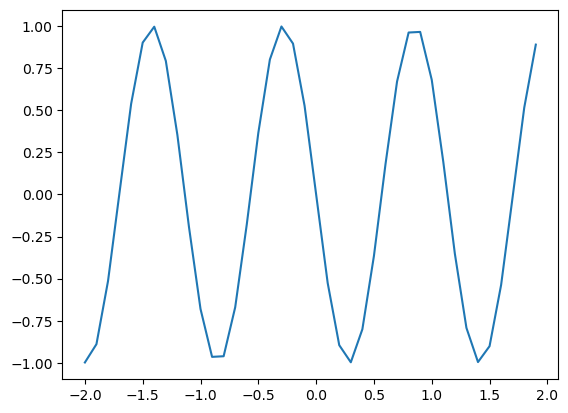

In [48]:
plt.plot(x,y)

plt.show()

In [49]:
x.shape

(40,)

### Ajuste polinomico a la curva seno creada

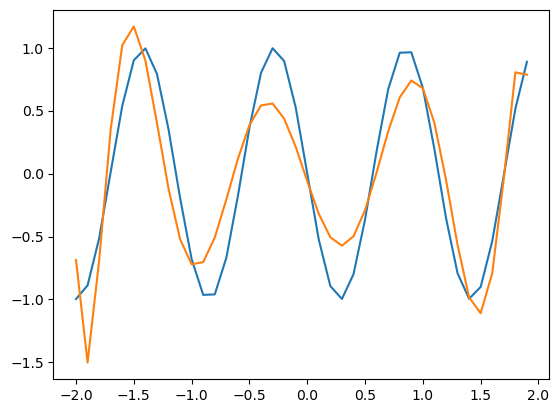

In [50]:
coeficientes = np.polyfit(x,y,9)   #curva inicial de 40 terminos aproxima a n-1
y_estimada = np.polyval(coeficientes,x)

plt.plot(x,y)
plt.plot(x,y_estimada)

plt.show()

## 2.2 Numeros Aleatorios

### Distribuciones de Probabilidad

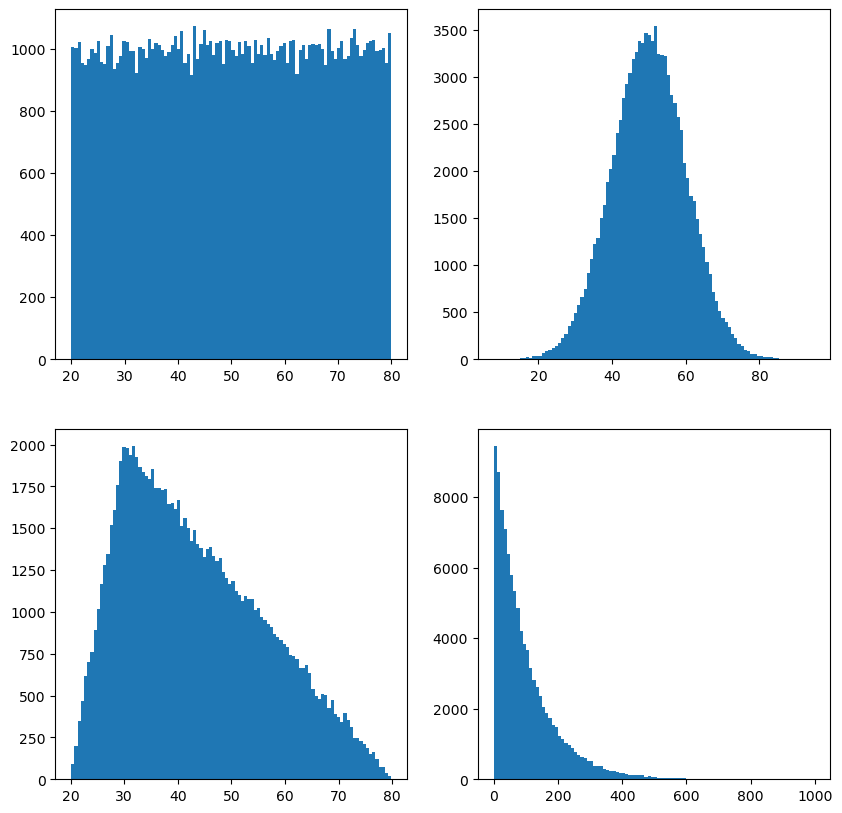

In [51]:
cantidad = 100000

plt.subplots(2,2, figsize=(10,10))

uniformes = np.random.uniform(20,80,cantidad)
plt.subplot(2,2,1)
plt.hist(uniformes, bins = 100)

normales = np.random.normal(50,10,cantidad)
plt.subplot(2,2,2)
plt.hist(normales, bins = 100)

triangular = np.random.triangular(20,30,80,cantidad)
plt.subplot(2,2,3)
plt.hist(triangular, bins = 100)

expo = np.random.exponential(100,cantidad)
plt.subplot(2,2,4)
plt.hist(expo, bins = 100)



plt.show()

## <font color=#33A5FF>****3. Procesamiento de señal (scipy.signal)****<tfont>

In [52]:
import numpy as np
from scipy import signal, misc
import matplotlib.pyplot as plt

<div class="alert alert-info">Una función ideal para reconstruir muestras a partir de coeficientes de spline y es más rápida que convolve2d, lo que implica filtros arbitrarios en 2-D y permite elegir condiciones límite simétricas especulares.</div>

In [54]:
image = misc.face(gray=True).astype(np.float32) #Imagen de librería Scipy misc
image2 = misc.face()
derfilt = np.array([1.0, -2, 1.0], dtype=np.float32)
ck = signal.cspline2d(image, 8.0) # Matrix de la imagen
deriv = (signal.sepfir2d(ck, derfilt, [1]) + 
         signal.sepfir2d(ck, [1], derfilt)) #derivada de la imagen completa forma 1

C:\Users\emman\AppData\Local\Temp\ipykernel_5780\3367973856.py:1: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  image = misc.face(gray=True).astype(np.float32) #Imagen de librería Scipy misc
C:\Users\emman\AppData\Local\Temp\ipykernel_5780\3367973856.py:2: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  image2 = misc.face()


<div class="alert alert-info">Alternativamente, podríamos haber hecho:</div>

In [55]:
laplacian = np.array([[0,1,0], [1,-4,1], [0,1,0]], dtype=np.float32)
deriv2 = signal.convolve2d(ck,laplacian,mode='same',boundary='symm') #derivada de la imagen completa forma 2

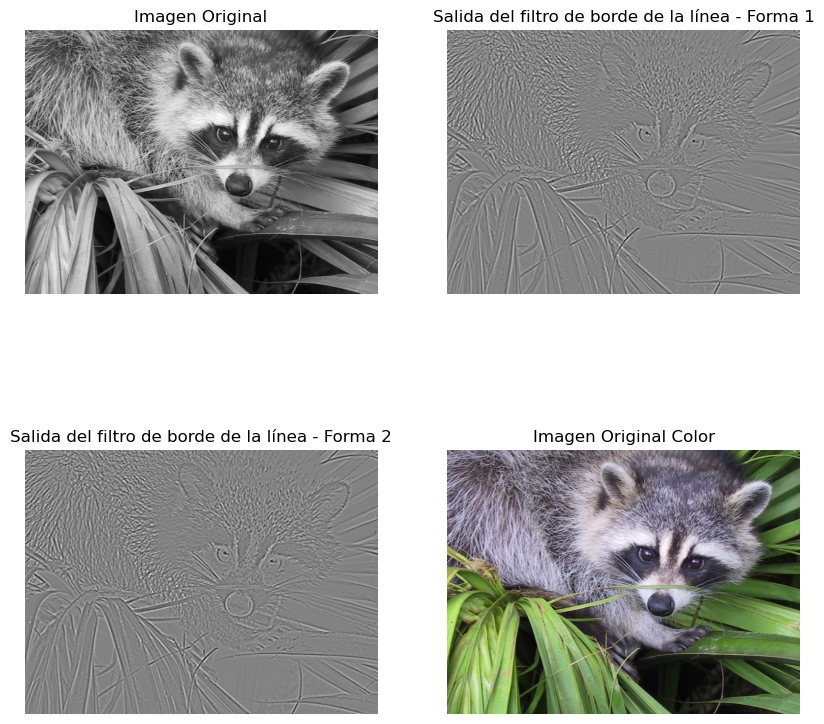

In [56]:
plt.subplots(2,2,figsize=(10,10))

plt.subplot(221)
plt.title('Imagen Original')
plt.imshow(image)
plt.gray()
plt.axis('off')

plt.subplot(222)
plt.title('Salida del filtro de borde de la línea - Forma 1')
plt.imshow(deriv)
plt.gray()
plt.axis('off')

plt.subplot(223)
plt.title('Salida del filtro de borde de la línea - Forma 2')
plt.imshow(deriv2)
plt.gray()
plt.axis('off')

plt.subplot(224)
plt.title('Imagen Original Color')
plt.imshow(image2)
plt.gray()
plt.axis('off')


plt.show()